In [5]:
import albumentations as A
import cv2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

from pathlib import Path
from PIL import Image
import random

In [6]:
data_root = Path('/opt/ml/input/data/train_dataset')
image_root = data_root / 'images'
level_txt = data_root / 'level.txt'
gt_txt = data_root / 'gt.txt'
tokens_txt = data_root / 'tokens.txt'
extra_latext_txt = '/opt/ml/input/data/json/extra_latex.txt'

In [7]:
a = list(image_root.glob('*'))
max_len = len(a)

old_images = []

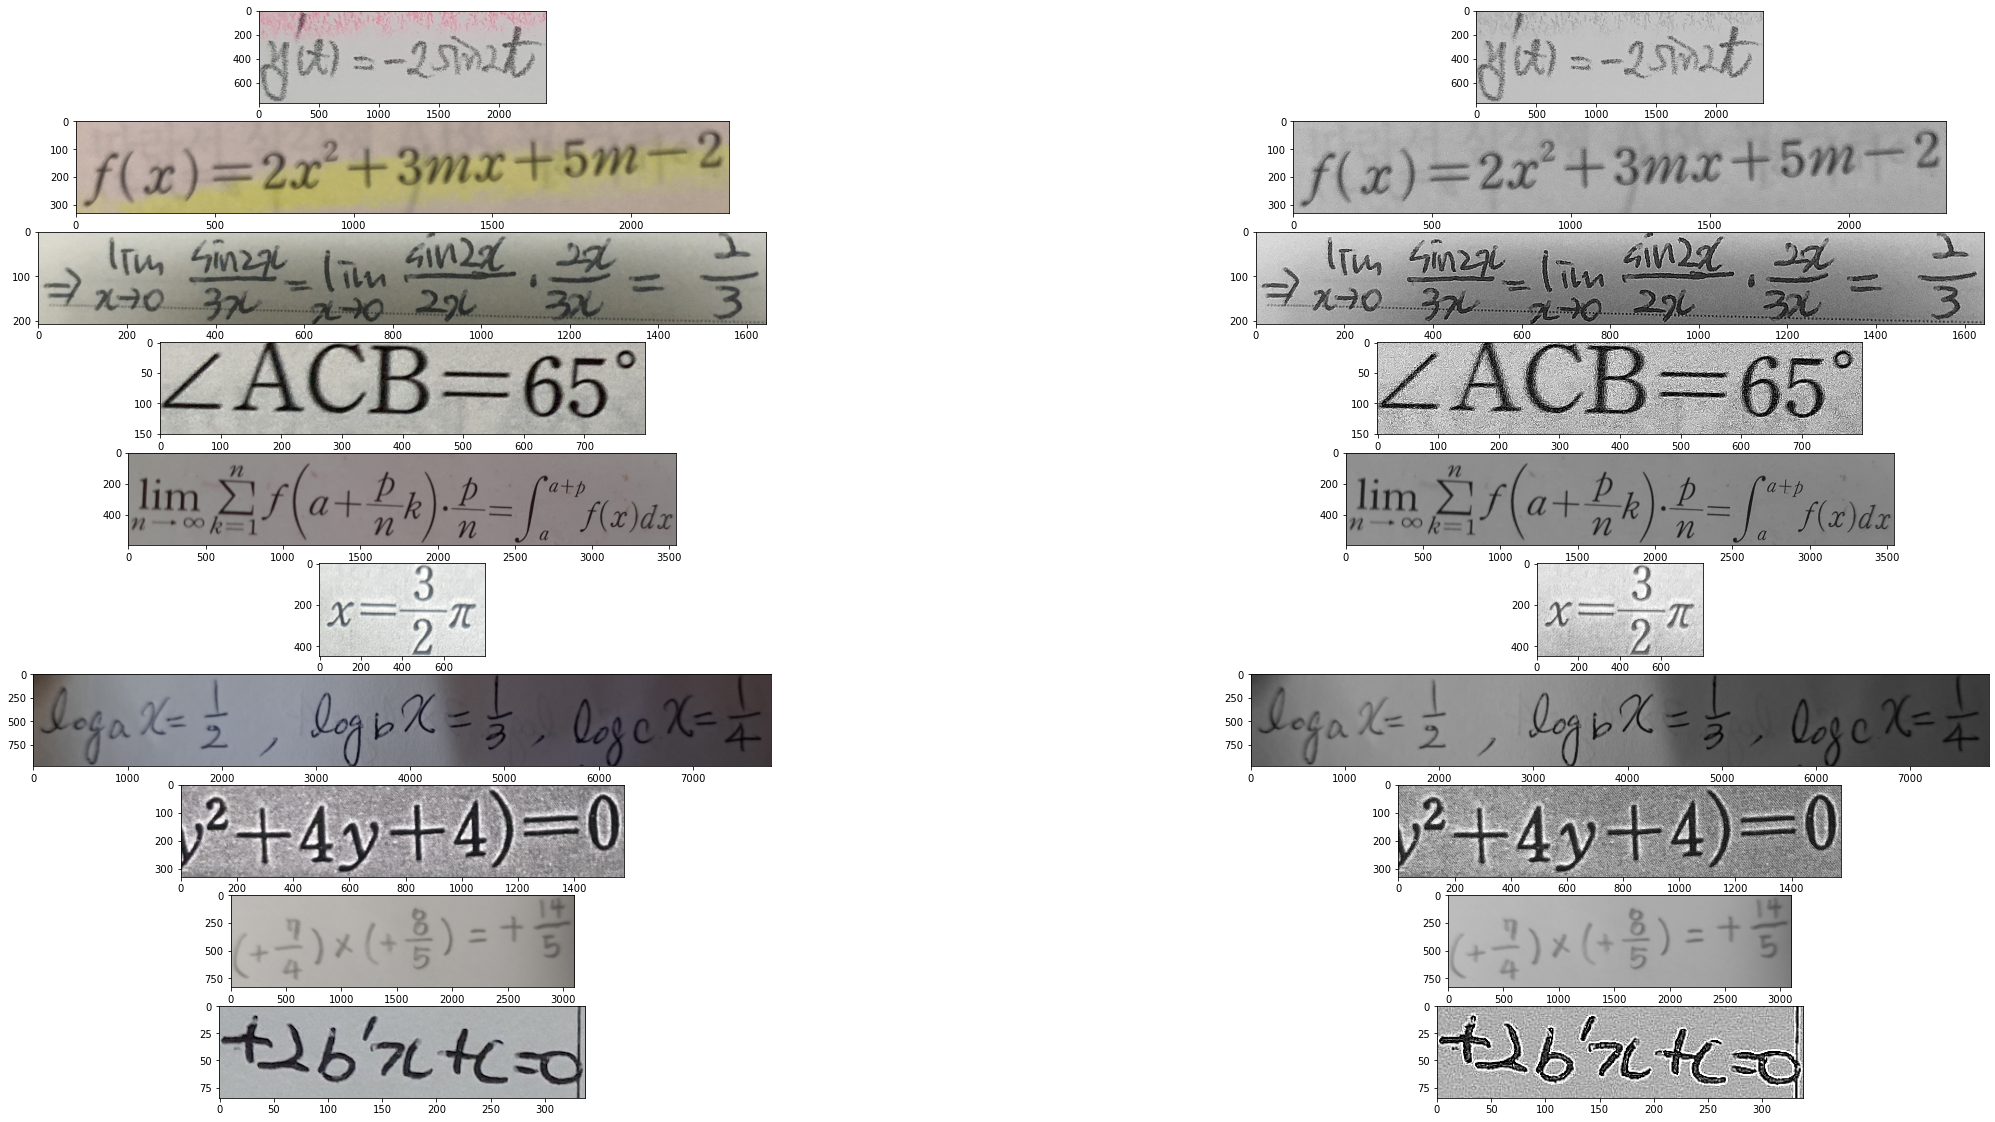

In [27]:
use_new_index = False

transform = A.Compose([
#     A.RandomCrop(width=256, height=256),
#     A.HorizontalFlip(p=0.5),
#         A.CLAHE(always_apply=True),
        A.ToGray(always_apply=True),
    
    A.Sharpen(alpha=(1, 1), lightness=(1, 1.0), always_apply=True),


])

n_col = 10
# Read an image with OpenCV and convert it to the RGB colorspace
original_images = []
transformed_images = []

if use_new_index:
    old_images = []
else:
    original_images = old_images
for i in range(n_col):
    if use_new_index:
        idx = random.randint(0, max_len-1)
        image = cv2.imread(str(a[idx]))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        original_images.append(image)
        old_images.append(image)

        transformed = transform(image=image)
        transformed_image = transformed["image"]
        transformed_images.append(transformed_image)
    else:
        transformed = transform(image=old_images[i])
        transformed_image = transformed["image"]
        transformed_images.append(transformed_image)

fig, axes = plt.subplots(n_col, 2, figsize=(40, 20))

for i in range(n_col):
    axes[i][0].imshow(original_images[i])
    axes[i][1].imshow(transformed_images[i])
    
plt.show()

In [66]:
from sympy.abc import tau
from sympy import latex, Rational
from pyparsing import ParseException
import matplotlib.pyplot as plt
plt.style.use('dark_background')

try:
#     raise ValueError()
    a = latex((2*tau)**Rational(7, 2))
    a = '{2s'
    plt.text(0.5, 0.5,'$%s$'%a, size=30, color='orange')
#     plt.show()
except Exception as e:
    print('wrong latex format')


ValueError: 
${2s$
^
Expected end of text, found '$'  (at char 0), (line:1, col:1)

<Figure size 432x288 with 1 Axes>

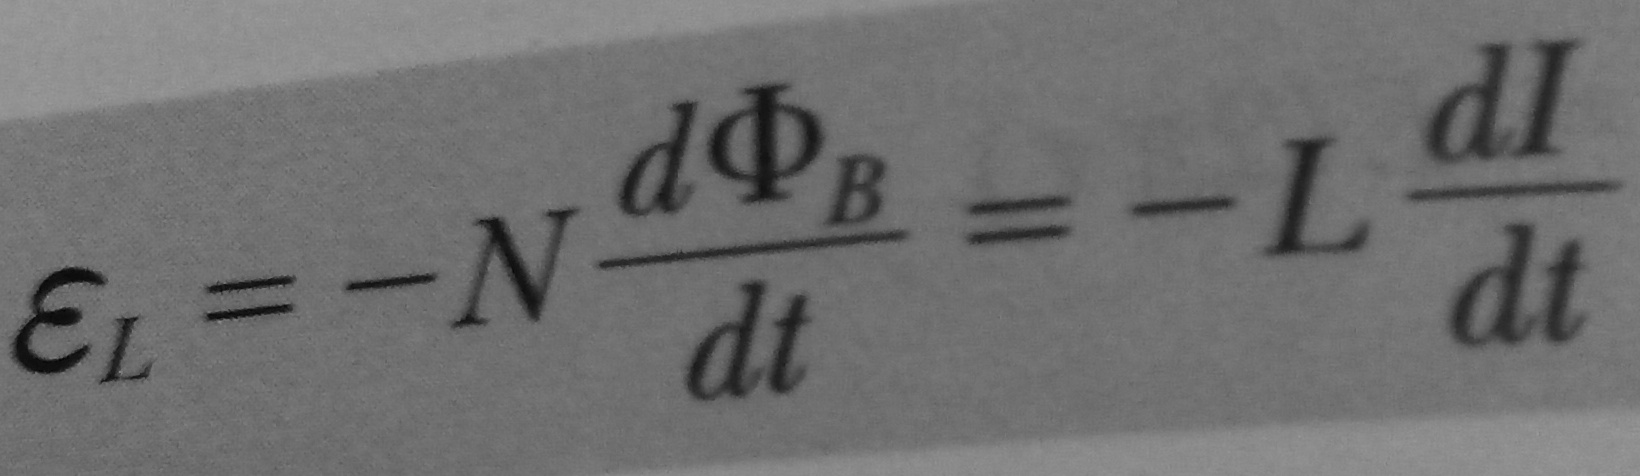

In [17]:
image = Image.open(a[10])
# image.convert("RGB")
image.convert("L")

In [1]:
from PIL import Image